# Nubes de palabras

Este ejercicio es una adaptación del tutorial disponible en Kaggle [aquí](https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews).

### Cargamos los módulos a utilizar

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

### Accediendo datos en Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'Práctica Numpy.ipynb'	'Práctica Pandas.ipynb'   Untitled0.ipynb


In [9]:
%cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [10]:
!ls

'Práctica Numpy.ipynb'	'Práctica Pandas.ipynb'  'Práctica WordCloud.ipynb'


In [11]:
!wget --no-check-certificate https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv -O imdb.csv

--2024-01-20 13:52:08--  https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘imdb.csv’

imdb.csv            100%[===================>]  63.14M  47.9MB/s    in 1.3s    

2024-01-20 13:52:10 (47.9 MB/s) - ‘imdb.csv’ saved [66212309/66212309]



In [15]:
# Path of the file to read
filepath = "/content/drive/MyDrive/Colab Notebooks/imdb.csv"

# Read the file into a variable fifa_data
data = pd.read_csv(filepath)

In [16]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [23]:
data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### Creamos las nubes de palabras

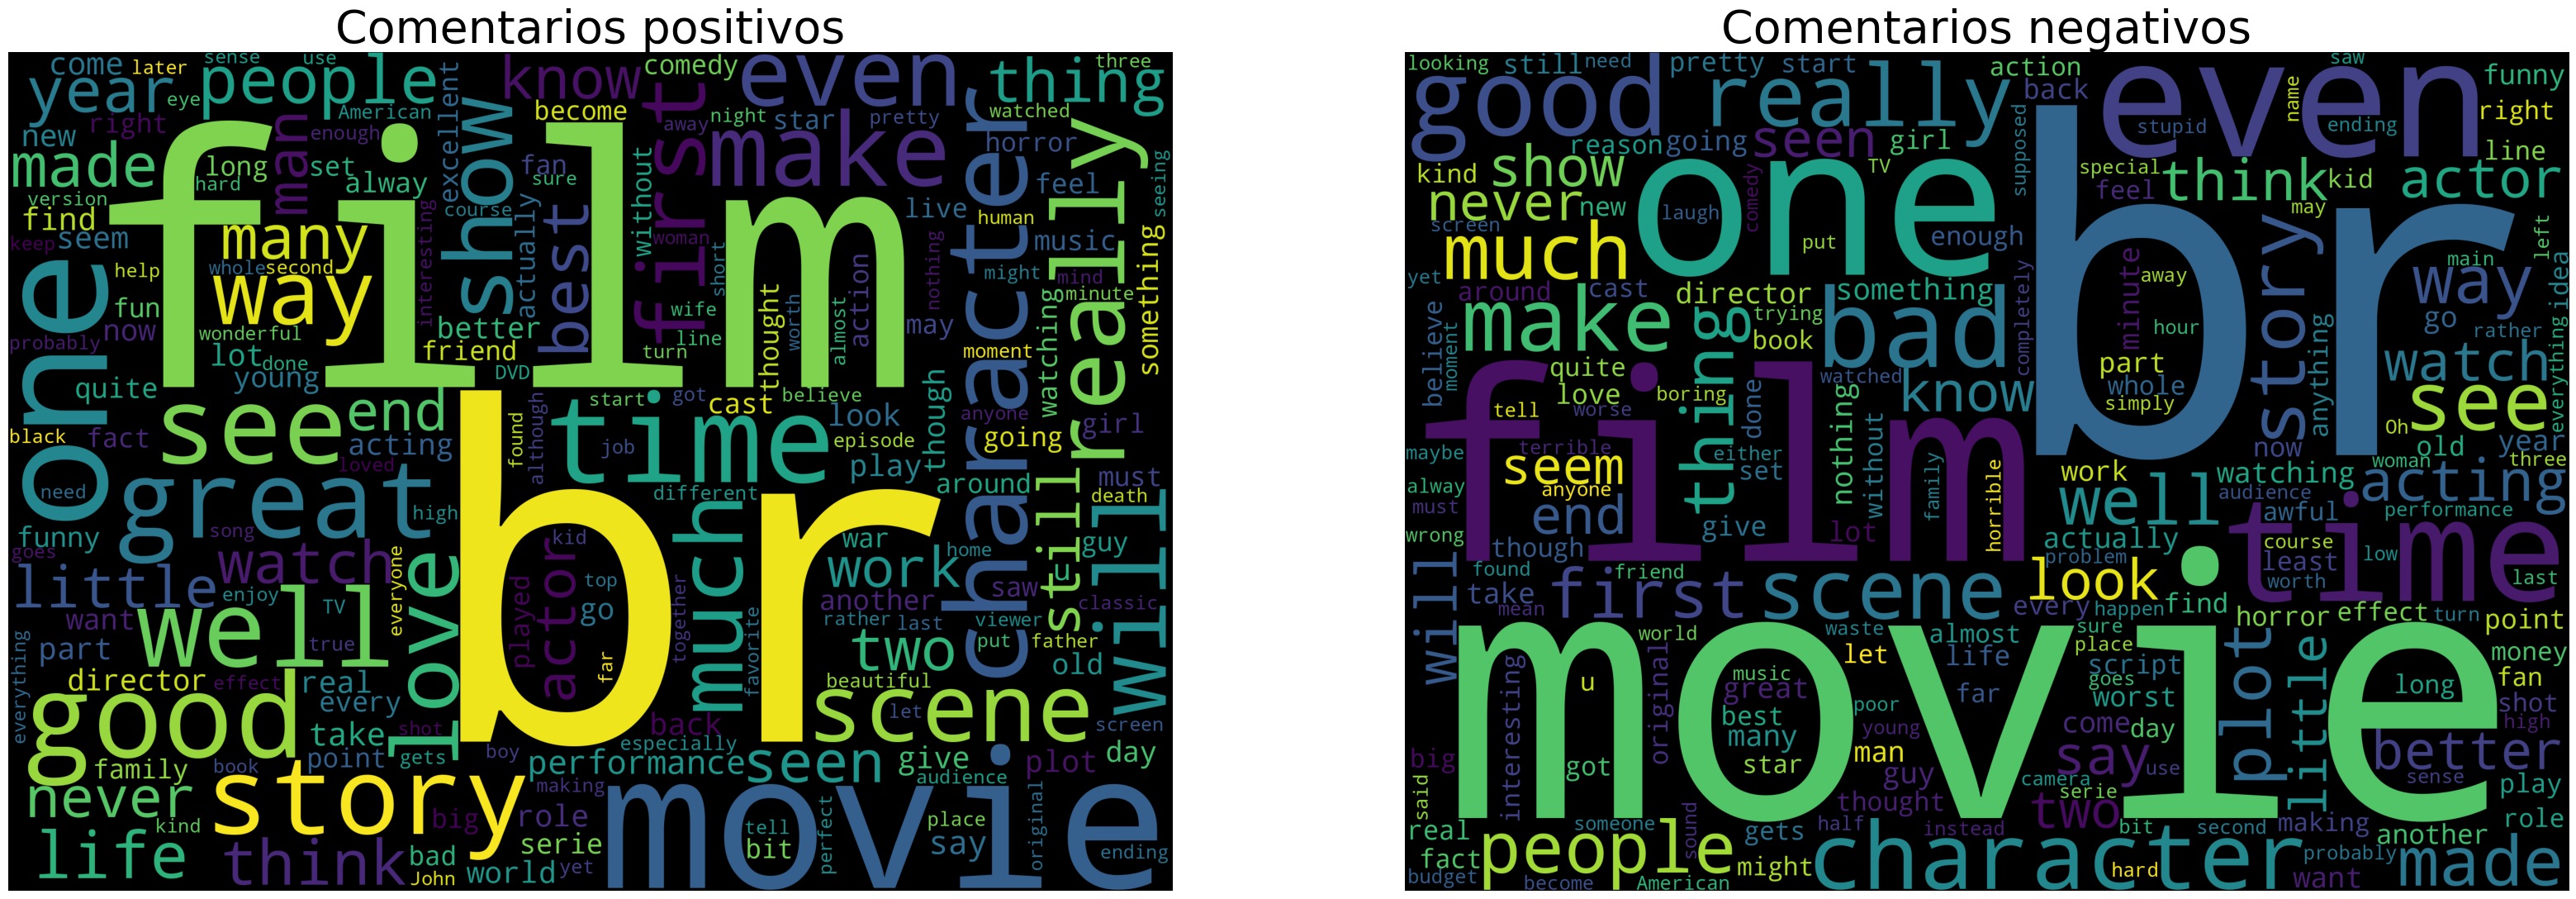

In [21]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# positivos
subset = data[data.sentiment=="positive"]
text = subset.review.values
cloud_positivos = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Comentarios positivos",fontsize=40)
plt.imshow(cloud_positivos)

# negativos
subset = data[data.sentiment=="negative"]
text = subset.review.values
cloud_positivos = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Comentarios negativos",fontsize=40)
plt.imshow(cloud_positivos)

### Preprocesamiento

#### Palabras sin valor (stopwords)

In [26]:
#Descargamos
nltk.download('stopwords')

#Separación en palabras (Tokenization)
tokenizer=ToktokTokenizer()

#stopwords en inglés
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Quitamos etiquetas HTML y texto innecesario

In [27]:
#Removemos etiquetas html
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removemos corchetes
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removemos caracteres especiales
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Sustituimos múltiples espacios por espacio sencillo
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text, flags=re.I)

#Convertimos a minúsculas
def convert_lowercase(text):
  return text.lower()

#Removemos texto innecesario
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = remove_extra_spaces(text)
    text = convert_lowercase(text)
    return text

#Apply function on review column
data['review']=data['review'].apply(denoise_text)

<ipython-input-27-3bc6c801bf23>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


### Convertir palabras a su raíz (Text Stemming)

In [28]:
#Pasando el texto a su raíz
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Aplicamos la función en la columna review
data['review']=data['review'].apply(simple_stemmer)

### Quitando las palabras que no aportan valor (stopwords)



In [29]:
#seleccionamos las palabras en inglés
stop=set(stopwords.words('english'))
print(stop)

#removemos las stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Aplicamos la función en la columna review
data['review']=data['review'].apply(remove_stopwords)

{'him', 'yourself', 'them', 'he', "you'll", 'both', 'll', 'do', 'and', "mustn't", 'aren', 'not', 'can', 'did', 'to', 'haven', 'myself', 'needn', "don't", "hasn't", 'being', 'further', 'ours', 'does', 'but', 'more', 'very', 'didn', 'hasn', 'ain', 'me', 'why', 'below', 'yours', 'over', 'all', 'this', 'were', 'ourselves', 'is', 'by', 'then', "shouldn't", "wasn't", 'their', 'under', 'my', 'a', 'now', 'too', 'weren', 'don', 'your', 'what', 'ma', 'shan', 'will', 'own', "wouldn't", 'out', 'before', "weren't", 'm', 's', 't', 'you', 'here', 'isn', 'wasn', "should've", 'that', "you'd", "you've", 'had', 'off', 'when', 'only', 'about', 'having', 'against', 'she', 'into', 'our', 'itself', 'during', 'such', 'the', 'other', 'up', 'because', 'herself', "haven't", "aren't", 'between', 'until', 'while', "couldn't", 'on', "it's", 'won', 'than', 'yourselves', 'they', 'was', 'those', 'have', "hadn't", 'how', 'it', 'been', 'with', "isn't", 'there', 'through', 'mightn', 'if', "that'll", 'of', 'his', 'after',

### Creamos las nubes de palabras de nuevo

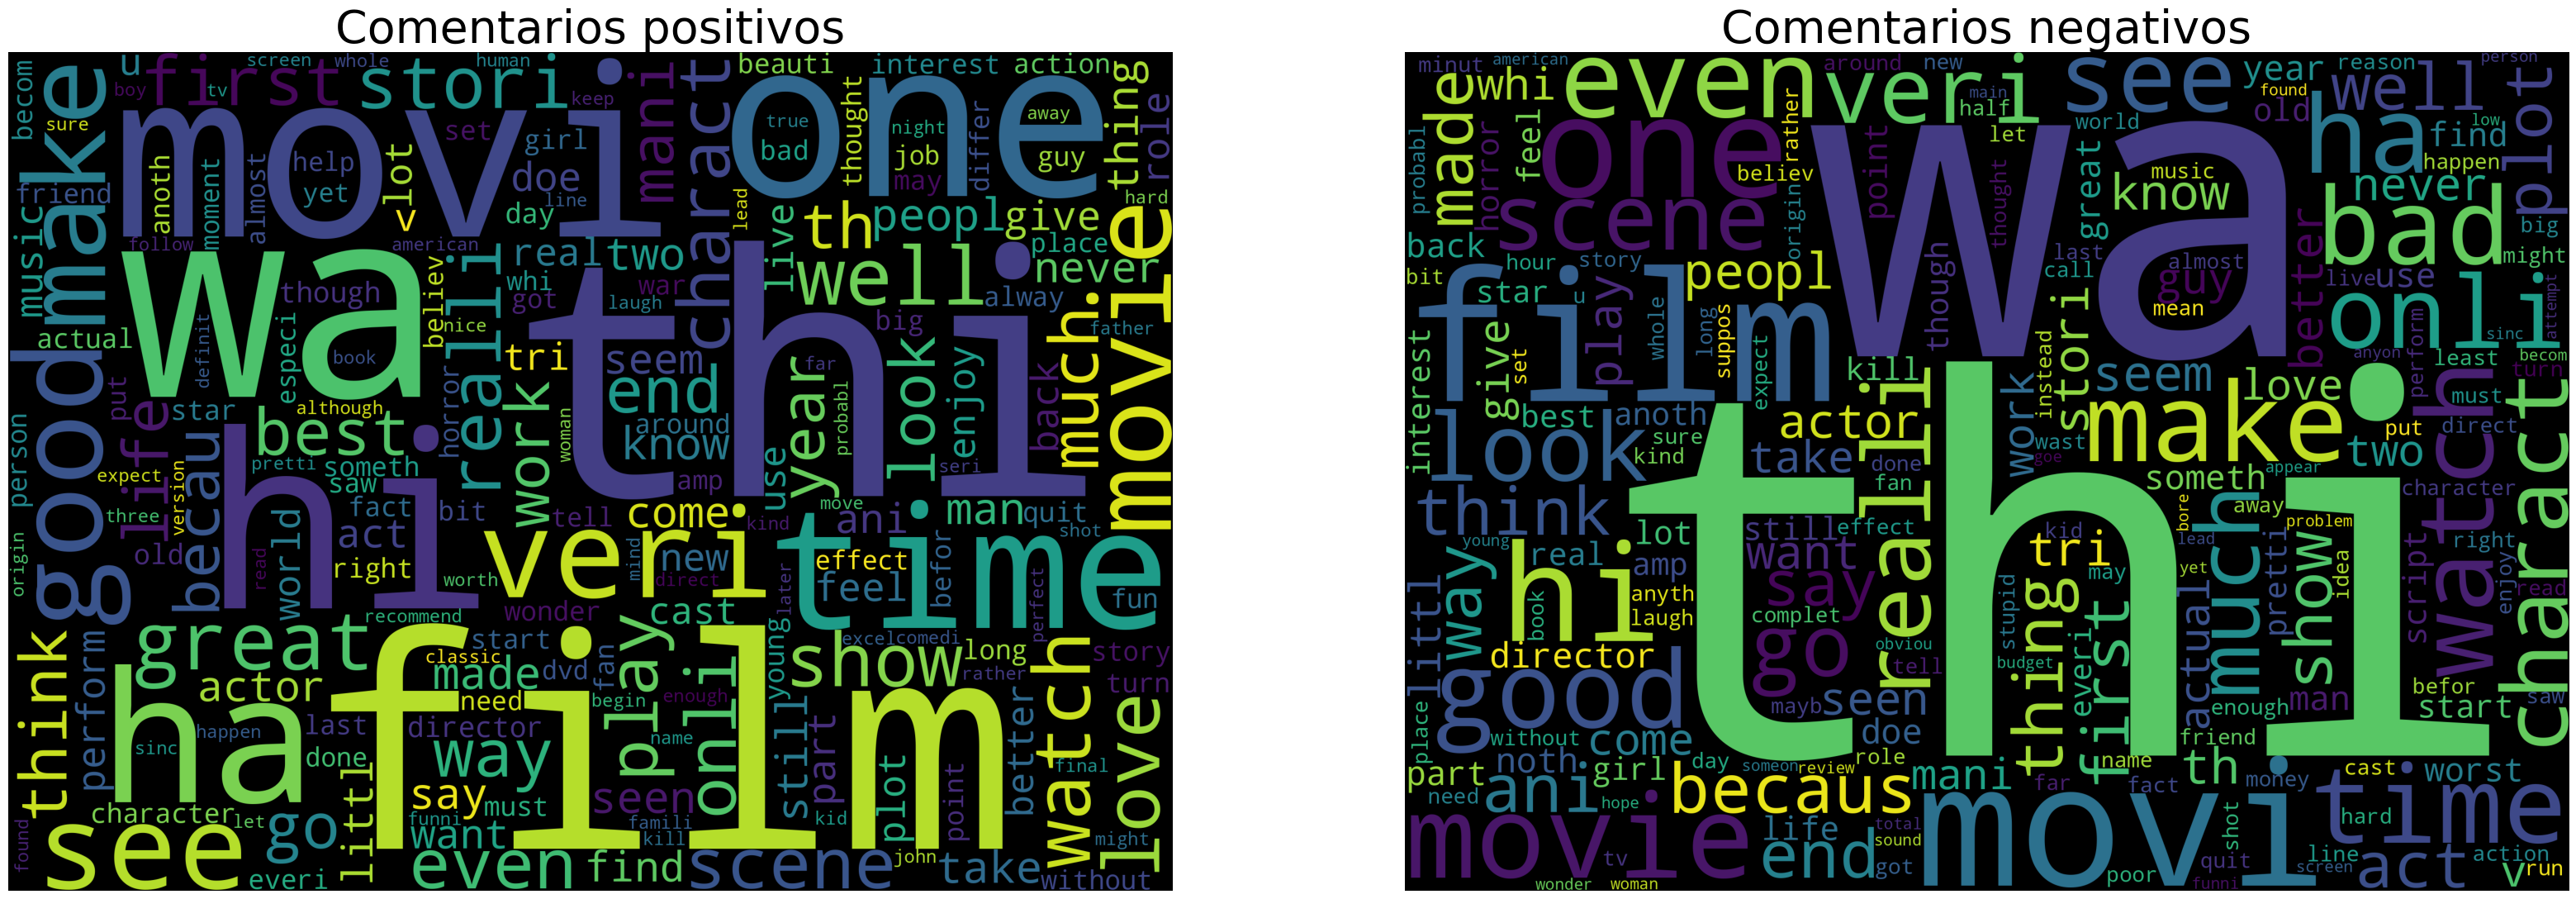

In [30]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# positivos
subset = data[data.sentiment=="positive"]
text = subset.review.values
cloud_positivos = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("Comentarios positivos",fontsize=40)
plt.imshow(cloud_positivos)

# negativos
subset = data[data.sentiment=="negative"]
text = subset.review.values
cloud_positivos = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("Comentarios negativos",fontsize=40)
plt.imshow(cloud_positivos)